# Section 1: Title Page

## STAT 301 - Group 2 - Final Project

December 4, 2025

---


Aidan Aimy (64474554)

Daphne Tian (78295474)

Isabelle Partovi (20390308)

# Section 2: Introduction

Online retail has become a large channel for consumer purchasing in recent years, with digital engagement metrics increasingly used by companies to understand consumer behaviour. Factors such as income, online activity patterns, and demographic charcteristics are commonly linked to purchasing decisions in marketing analytics. Businesses then use these insights to tailor campaigns and strategies to capture a larger consumer base with the end goal of driving higher revenues.

The *Customer Personality Analysis* dataset provides a rich view into household demographics, socioeconomic status, and behavioural engagement indicators over a large set of customers. This dataset is suitable for exploring whether different types of customers with specific attributes are more likely to engage in online purchasing.

## Research Question

Motivated by the context of online retail and the availability of detailed customer information, we aim to investigate the following inference focused question:


> How are socioeconomic factors, such as customers' yearly household income (`Income`) and number of children (`Dependents` = `Kidhome` + `Teenhome`), along with behavioural engagement (`NumWebVisitsMonth`), associated with the number of online purchases (`NumWebPurchases`) made by customers?

Since this is observational data, we can study associations but cannot make any causal claims. Given that association is not causation, we are not measuring the effect of one variable on another. Our goal is to describe if any patterns emerge in the relationship between the explanatory variables and online purchasing activity. 

## Existing Literature
Prior research has examined how socioeconomic and behavioural factors have related to online purchasing activity. For example, in the study "An Empirical Investigation of Online Consumer Purchasing Behavior," Ahuja et al. (2003) found that online purchasing patterns do emerge and differ across different demographic groups. Their study claims that browsing behaviour and income levels are tightly associated with the likelihood of online shopping. Ahuja et al. suggest that customer characteristics and digital engagement metrics play a vital role in shaping online behaviour, which aligns with the research question we explore in this study.

# Section 3: Methods and Results

## a) Data

In [3]:
library(tidyverse)
library(knitr)

customer <- read_tsv(
    "https://raw.githubusercontent.com/arienugroho050396/Customer-Personality-Analysis/main/marketing_campaign.csv"
)

head(customer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


### Dataset: Customer Personality Analysis
The *Customer Personality Analysis* dataset contains detailed information about 2,240 customers of a company that sells products through multiple channels (online, catalog, and stores). The data combines demographic, purchase, promotion, and web-activity information. It is used to analyze customer profiles, segment behavior, and understand how different factors influence marketing responses and spending patterns.

The dataset contains 2,240 observations and 29 variables. In the raw dataset, 26 variables are stored as numerical values and 3 variables are stored as character strings. Based on their meaning, the numeric variables represent continuous measurements, discrete counts, or binary 0/1 indicators. The character variables represent categorical information such as education level and marital status.

Below, all variables are grouped by theme and labeled according to their stored type in R and their statistical type.

---

#### People variables:    
| Variable           | Description                                                                                         | Stored Type in R | Statistical Type         |
| ------------------ | --------------------------------------------------------------------------------------------------- | ---------------- | ------------------------ |
| **ID**             | A unique identifier assigned to each customer                                                       | dbl              | categorical identifier   |
| **Year_Birth**     | The customer’s year of birth                                                                        | dbl              | numeric (discrete year)  |
| **Education**      | The highest level of education completed by the customer (2n Cycle, Basic, Graduation, Master, PhD) | chr              | categorical (ordinal)    |
| **Marital_Status** | The customer’s marital status (Absurd, Alone, Divorced, Married, Single, Together, Widow, YOLO)     | chr              | categorical (ordinal)    |
| **Income**         | The customer’s yearly household income                                                              | dbl              | numeric (continuous)     |
| **Kidhome**        | The number of children in the customer’s household                                                  | dbl              | numeric (discrete count) |
| **Teenhome**       | The number of teenagers in the customer’s household                                                 | dbl              | numeric (discrete count) |
| **Dt_Customer**    | The date when the customer first enrolled with the company                                          | chr              | date (stored as string)  |
| **Recency**        | The number of days since the customer’s last purchase                                               | dbl              | numeric (discrete count) |
| **Complain**       | Whether the customer filed a complaint in the past two years                                        | dbl              | binary categorical       |

---

#### Product variables:
| Variable             | Description                                         | Stored Type in R | Statistical Type     |
| -------------------- | --------------------------------------------------- | ---------------- | -------------------- |
| **MntWines**         | Amount spent on wine in the last two years          | dbl              | numeric (continuous) |
| **MntFruits**        | Amount spent on fruits in the last two years        | dbl              | numeric (continuous) |
| **MntMeatProducts**  | Amount spent on meat products in the last two years | dbl              | numeric (continuous) |
| **MntFishProducts**  | Amount spent on fish products in the last two years | dbl              | numeric (continuous) |
| **MntSweetProducts** | Amount spent on sweets in the last two years        | dbl              | numeric (continuous) |
| **MntGoldProds**     | Amount spent on gold products in the last two years | dbl              | numeric (continuous) |

---

#### Promotion variables:
| Variable              | Description                                                 | Stored Type in R | Statistical Type         |
| --------------------- | ----------------------------------------------------------- | ---------------- | ------------------------ |
| **NumDealsPurchases** | Number of purchases made with a discount                   | dbl              | numeric (discrete count) |
| **AcceptedCmp1**      | 1 = Customer accepted the offer during the first marketing campaign,<br>0 = Otherwise  | dbl              | binary categorical       |
| **AcceptedCmp2**      | 1 = Customer accepted the offer during the second marketing campaign,<br>0 = Otherwise | dbl              | binary categorical       |
| **AcceptedCmp3**      | 1 = Customer accepted the offer during the third marketing campaign,<br>0 = Otherwise  | dbl              | binary categorical       |
| **AcceptedCmp4**      | 1 = Customer accepted the offer during the fourth marketing campaign,<br>0 = Otherwise | dbl              | binary categorical       |
| **AcceptedCmp5**      | 1 = Customer accepted the offer during the fifth marketing campaign,<br>0 = Otherwise  | dbl              | binary categorical       |
| **Response**          | 1 = Customer accepted the offer during the most recent marketing campaign,<br>0 = Otherwise      | dbl              | binary categorical       |

---

#### Place variables:
| Variable                | Description                                            | Stored Type in R | Statistical Type         |
| ----------------------- | ------------------------------------------------------ | ---------------- | ------------------------ |
| **NumWebPurchases**     | Number of purchases made through the company’s website | dbl              | numeric (discrete count) |
| **NumCatalogPurchases** | Number of purchases made using a catalog               | dbl              | numeric (discrete count) |
| **NumStorePurchases**   | Number of purchases made in physical stores            | dbl              | numeric (discrete count) |
| **NumWebVisitsMonth**   | Number of website visits in the last month             | dbl              | numeric (discrete count) |

---

#### Other variables:
| Variable      | Description                                                             | Stored Type in R | Statistical Type   |
| ------------- | ----------------------------------------------------------------------- | ---------------- | ------------------ |
| **Z_CostContact** | Constant variable used internally for marketing cost standardization    | dbl              | numeric (constant) |
| **Z_Revenue**     | Constant variable used internally for marketing revenue standardization | dbl              | numeric (constant) |

---

### Source and Collection Information
The dataset originates from Kaggle and was published by Akash Patel (n.d.) under the title *Customer Personality Analysis*. As credited on the Kaggle page, the underlying data was provided by Dr. Omar Romero-Hernandez. 

**Source:** Patel, A. (n.d.). *Customer personality analysis* [Data set]. Kaggle. https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

### Pre-selection of Variables
Pre-selection helps by removing potentially confounding variables that are outside the scope of our inferential research question. 

Out of the 29 variables provided, we will keep:
- Target Variable: `NumWebPurchases`
- Covariates: `Kidhome`, `Teenhome`, `NumWebVisitsMonth`, `Income`

In the analysis, we further combine `Kidhome` and `Teenhome` into a single `Dependents` variable.

## b) Exploratory Data Analysis

In [14]:
# filtering + cleaning

customer2 <- customer %>% # make a new dataset and select the variables of interest
    select(Income, Kidhome, Teenhome, NumWebPurchases, NumWebVisitsMonth) %>% 
    mutate(Dependents = Kidhome + Teenhome) %>% # creating the Dependents variable which aggregtes Kidhome and Teenhome
    drop_na() %>%  # dropping NA values for data completeness
    select(-Kidhome, -Teenhome) # removing Kidhome and Teenhome variables now that we have created Dependents variable

head(customer2)
summary(customer2)

Income,NumWebPurchases,NumWebVisitsMonth,Dependents
<dbl>,<dbl>,<dbl>,<dbl>
58138,8,7,0
46344,1,5,2
71613,8,4,0
26646,2,6,1
58293,5,5,1
62513,6,6,1


     Income       NumWebPurchases  NumWebVisitsMonth   Dependents    
 Min.   :  1730   Min.   : 0.000   Min.   : 0.000    Min.   :0.0000  
 1st Qu.: 35303   1st Qu.: 2.000   1st Qu.: 3.000    1st Qu.:0.0000  
 Median : 51382   Median : 4.000   Median : 6.000    Median :1.0000  
 Mean   : 52247   Mean   : 4.085   Mean   : 5.319    Mean   :0.9472  
 3rd Qu.: 68522   3rd Qu.: 6.000   3rd Qu.: 7.000    3rd Qu.:1.0000  
 Max.   :666666   Max.   :27.000   Max.   :20.000    Max.   :3.0000  

#### Description of `head(customer2)` and `summary(customer2)` outputs

We first created a working dataset `customer2` containing only the variables relevant to our research question: `Income`, `NumWebPurchases`, `NumWebVisitsMonth`, and `Dependents` (constructed as `Kidhome + Teenhome`). We then removed rows with missing values, leaving 2,216 complete customer records. The summary statistics show that `Income` is right-skewed with a wide range, while `NumWebPurchases` and `NumWebVisitsMonth` are positive counts with means around 4–5, and most households have 0–1 dependents.

In [5]:
vizdat <- customer2 %>%
  mutate(
    Dependents = as.numeric(Dependents),
    DepBand = case_when(
      Dependents <= 0 ~ "0 dependents",
      Dependents == 1 ~ "1 dependent",
      Dependents >= 2 ~ "2+ dependents"
    ),
    Income = as.numeric(Income),
    NumWebPurchases = as.numeric(NumWebPurchases),
    NumWebVisitsMonth = as.numeric(NumWebVisitsMonth)
  ) %>%
  mutate(
    VisitsBand = cut(
      NumWebVisitsMonth,
      breaks = c(-Inf, 3, 6, 9, Inf),
      labels = c("≤3", "4–6", "7–9", "≥10"),
      right = TRUE, include.lowest = TRUE
    ),
    VisitsBand = factor(VisitsBand, levels = c("≤3", "4–6", "7–9", "≥10"))
  )
head(vizdat)

Income,NumWebPurchases,NumWebVisitsMonth,Dependents,DepBand,VisitsBand
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
58138,8,7,0,0 dependents,7–9
46344,1,5,2,2+ dependents,4–6
71613,8,4,0,0 dependents,4–6
26646,2,6,1,1 dependent,4–6
58293,5,5,1,1 dependent,4–6
62513,6,6,1,1 dependent,4–6


#### Description of `head(vizdat)` output

We created a helper dataset vizdat in which we grouped customers by number of dependents and by monthly web-visit frequency. Specifically, we recoded `Dependents` into three categories (`0 dependents`, `1 dependent`, `2+ dependents`, stored in `DepBand`) and binned `NumWebVisitsMonth` into four visit bands (≤3, 4–6, 7–9, ≥10 visits, stored in `VisitsBand`).

DepBand,VisitsBand,n,mean_purchases
<chr>,<fct>,<int>,<dbl>
0 dependents,≤3,395,4.265823
0 dependents,4–6,145,5.158621
0 dependents,7–9,89,3.988764
0 dependents,≥10,4,0.250000
1 dependent,≤3,145,3.889655
1 dependent,4–6,482,4.782158
1 dependent,7–9,484,3.894628
1 dependent,≥10,6,2.833333
2+ dependents,≤3,24,3.166667


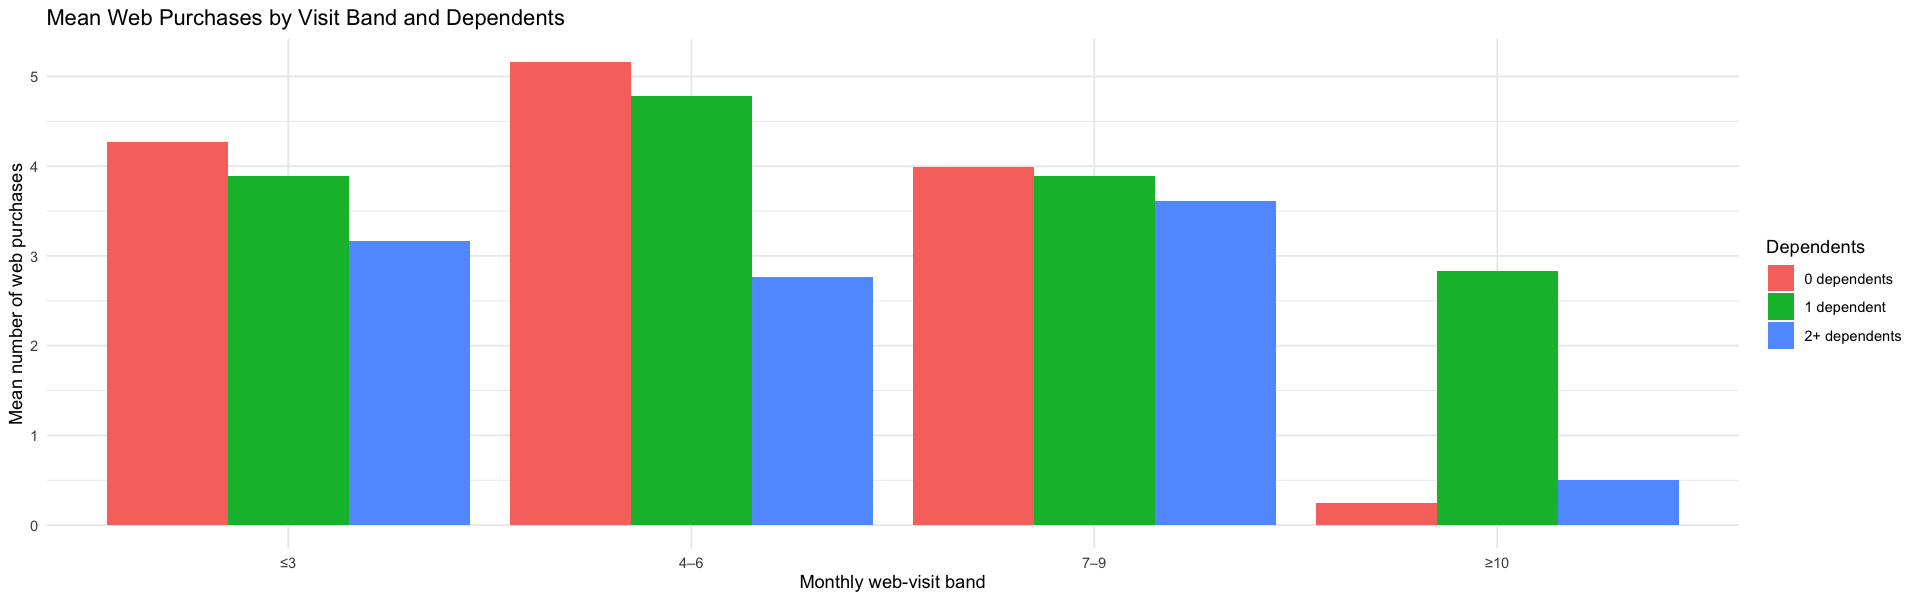

In [17]:
eda_summary <- vizdat %>%
  group_by(DepBand, VisitsBand) %>%
  summarise(
    n = n(),
    mean_purchases = mean(NumWebPurchases),
    .groups = "drop"
  )
eda_summary

eda_summary_barchart <- ggplot(eda_summary,
                   aes(x = VisitsBand,
                       y = mean_purchases,
                       fill = DepBand)) +
  geom_col(position = "dodge") +
  labs(
    title = "Mean Web Purchases by Visit Band and Dependents",
    x = "Monthly web-visit band",
    y = "Mean number of web purchases",
    fill = "Dependents"
  ) +
  theme_minimal()

eda_summary_barchart

#### Description of `eda_summary` table and `eda_summary_barchart` visualization

The table and bar chart summarize the mean number of web purchases by monthly web-visit band and number of dependents. The `eda_summary` table reports, for each combination of visit band (≤3, 4–6, 7–9, ≥10) and dependents group (0, 1, 2+), the number of customers and the mean number of web purchases. The `eda_summary_barchart` visualizes the web purchasing means as grouped bars. Customers who visit the website 4-6 times per month have the highest mean number of purchases, especially among households with 0 or 1 dependent. Within most visit bands, households with 2+ dependents have slightly fewer purchases on average than households with 0 or 1 dependent.

`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


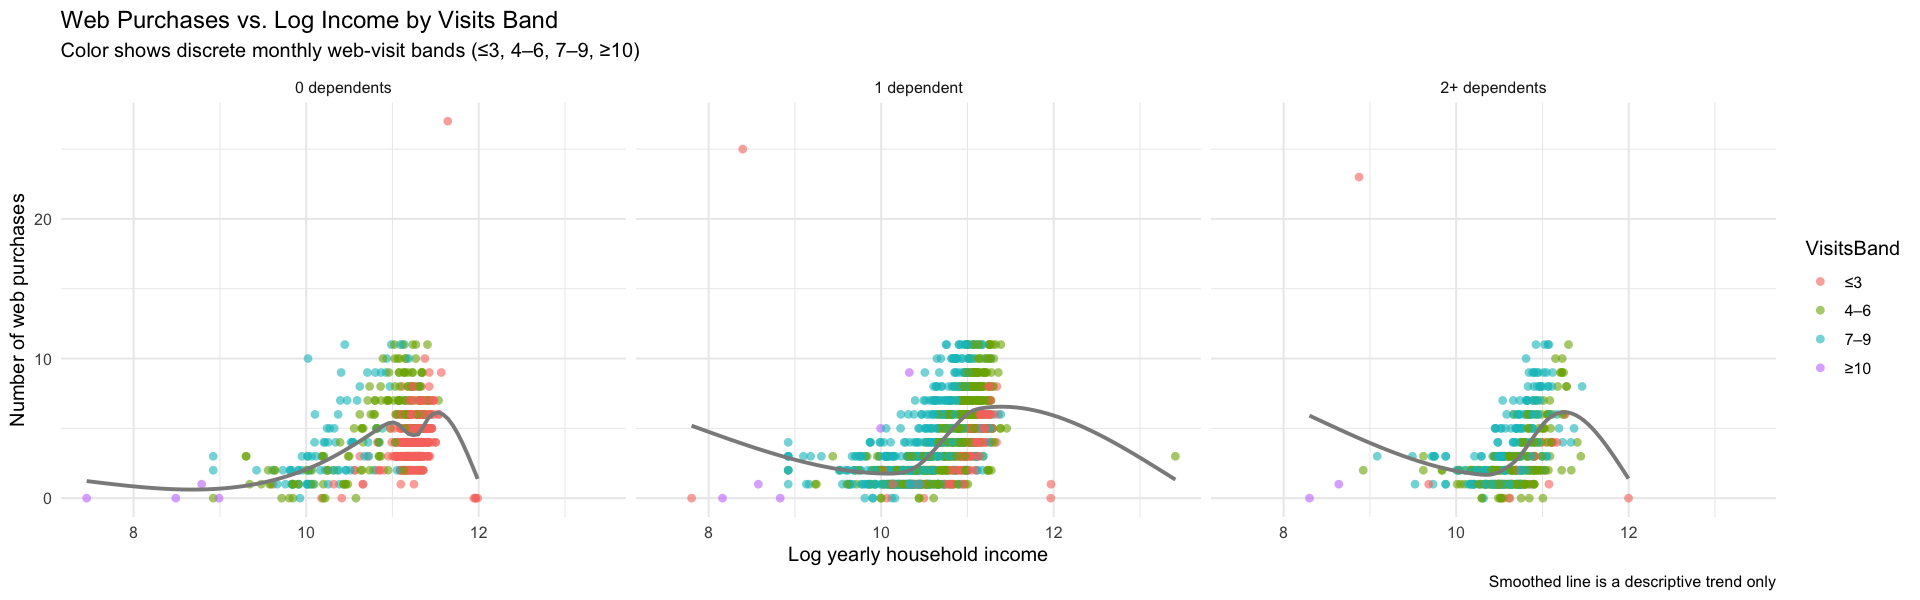

In [16]:
marketingdata_viz_log <- ggplot(vizdat,
                                aes(x = log(Income),
                                    y = NumWebPurchases,
                                    color = VisitsBand)) +
  geom_point(alpha = 0.6, shape = 16, size = 2.1) +
  geom_smooth(method = "gam", se = FALSE, color = "grey55") +
  facet_wrap(~ DepBand, nrow = 1) +
  labs(
    title = "Web Purchases vs. Log Income by Visits Band",
    subtitle = "Color shows discrete monthly web-visit bands (≤3, 4–6, 7–9, ≥10)",
    x = "Log yearly household income",
    y = "Number of web purchases",
    caption = "Smoothed line is a descriptive trend only"
  ) +
  theme_minimal(base_size = 12)

marketingdata_viz_log

#### Description of `marketingdata_viz_log` visualization

Shows web purchases versus log yearly household income, colored by monthly web-visit bands and faceted by number of dependents (0, 1, 2+). After log-transforming Income, the points spread more evenly along the x-axis and the relationship between income and purchases is easier to see. Within each dependents group there is a general upward trend: customers with higher log-income tend to make more web purchases. This pattern is especially strong among those with higher visit bands (7–9 and ≥10 visits), who are concentrated at higher purchase counts. Plotting income on the log scale reflects its strong right-skew on the original dollar scale and aligns with the transformation we use later in the Poisson model.

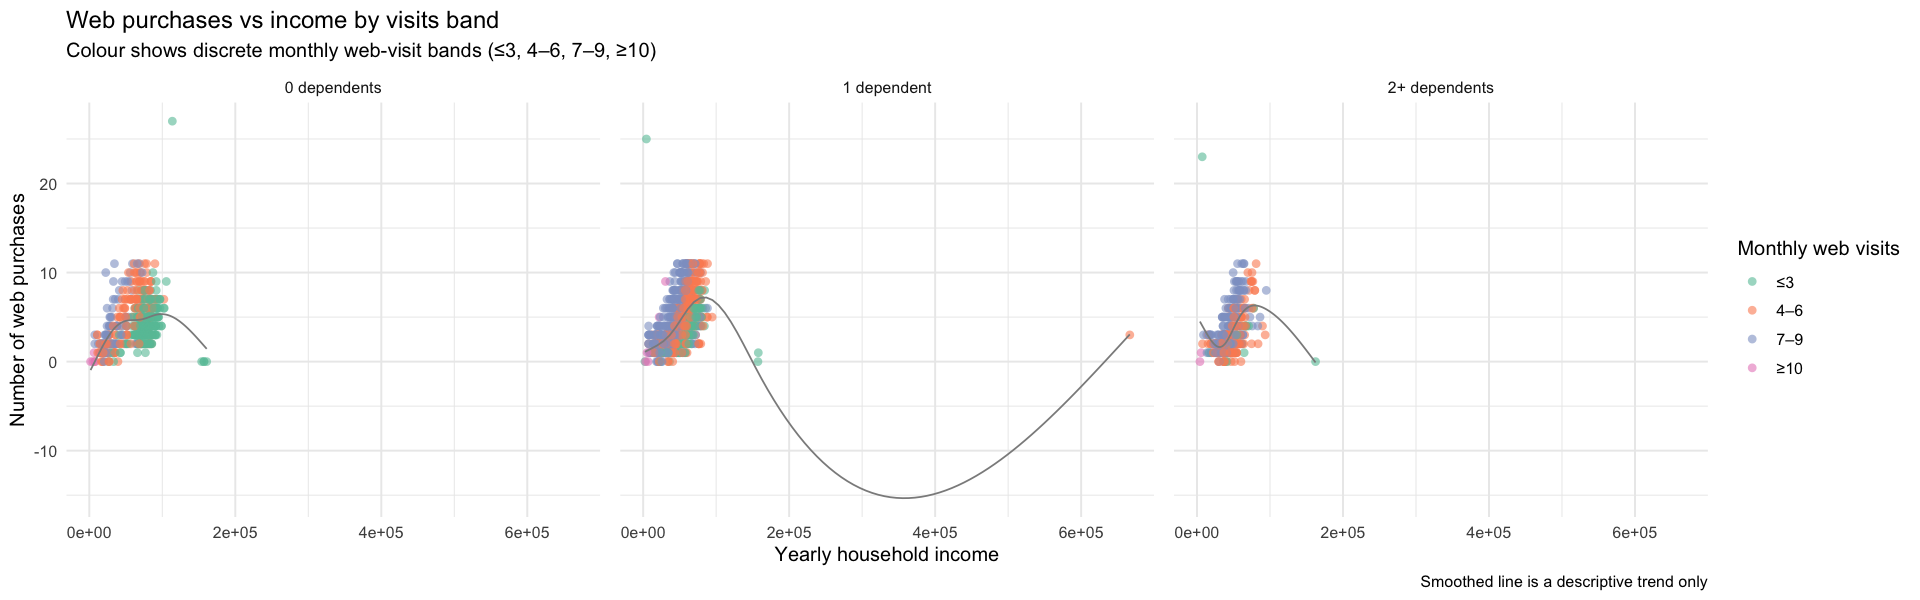

In [6]:
marketingdata_viz <- ggplot(vizdat, aes(x = Income, y = NumWebPurchases, colour = VisitsBand)) +
                     geom_point(alpha = 0.6, shape = 16, size = 2.1) +
                     geom_smooth(data = vizdat,
                                mapping = aes(x = Income, y = NumWebPurchases),
                                method = "gam", formula = y ~ s(x, k = 5),
                                se = FALSE, colour = "grey55", linewidth = 0.5, inherit.aes = FALSE) +
                     scale_colour_brewer(name = "Monthly web visits", palette = "Set2") +
                     facet_wrap(~ DepBand, nrow = 1) +
                     labs(title = "Web purchases vs income by visits band",
                          subtitle = "Colour shows discrete monthly web-visit bands (≤3, 4–6, 7–9, ≥10)",
                          x = "Yearly household income",
                          y = "Number of web purchases",
                          caption = "Smoothed line is a descriptive trend only") +
                     theme_minimal(base_size = 12) +
                     theme(panel.spacing = unit(12, "pt"), legend.position = "right")
options(repr.plot.width = 16, repr.plot.height = 5)

marketingdata_viz

## c) Methods: Plan

## d) Code and Results

#### Poisson and Quasi-Poisson models

In [7]:
# poisson for dispersion check
model_poisson <- glm(
  NumWebPurchases ~ log(pmax(Income, 1)) + NumWebVisitsMonth + Dependents,
  family = poisson(link = "log"),
  data   = customer2
)

summary(model_poisson)


Call:
glm(formula = NumWebPurchases ~ log(pmax(Income, 1)) + NumWebVisitsMonth + 
    Dependents, family = poisson(link = "log"), data = customer2)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -10.061669   0.315306 -31.911   <2e-16 ***
log(pmax(Income, 1))   1.010915   0.027423  36.863   <2e-16 ***
NumWebVisitsMonth      0.122515   0.005735  21.361   <2e-16 ***
Dependents            -0.140772   0.016290  -8.642   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3997.9  on 2215  degrees of freedom
Residual deviance: 2615.0  on 2212  degrees of freedom
AIC: 9355.2

Number of Fisher Scoring iterations: 5


In [8]:
poisson_dispersion <- sum(residuals(model_poisson, type = "pearson")^2) / df.residual(model_poisson)
poisson_dispersion

[1] 3.223057

In [9]:
# final model: quasi-Poisson
model_quasipoisson <- glm(
  NumWebPurchases ~ log(pmax(Income, 1)) + NumWebVisitsMonth + Dependents,
  family = quasipoisson(link = "log"),
  data   = customer2
)

summary(model_quasipoisson)


Call:
glm(formula = NumWebPurchases ~ log(pmax(Income, 1)) + NumWebVisitsMonth + 
    Dependents, family = quasipoisson(link = "log"), data = customer2)

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -10.06167    0.56606 -17.775  < 2e-16 ***
log(pmax(Income, 1))   1.01091    0.04923  20.533  < 2e-16 ***
NumWebVisitsMonth      0.12251    0.01030  11.898  < 2e-16 ***
Dependents            -0.14077    0.02925  -4.813 1.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 3.223057)

    Null deviance: 3997.9  on 2215  degrees of freedom
Residual deviance: 2615.0  on 2212  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


# Section 4: Discussion

# Section 5: References

Ahuja, M. K., Gupta, B., & Raman, P. (2003). An empirical investigation of online consumer purchasing behavior. *Communications of the ACM*, 46(12), 145-151. https://doi.org/10.1145/953460.953494

Patel, A. (n.d.). *Customer personality analysis* [Data set]. Kaggle. https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis